### Import configuration and data.

In [1]:
%load_ext autoreload
%autoreload 2

from trainer import *

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using {} device".format(device))

configfile = 'pr-SNL_MSU_DOE_lo-rmse_sp-random_va-True_ba-False_lr-003_we-002_ba-1024_se-False'

trainer = Trainer(device=device)
## Set params
trainer.load_config(default_configfile=configfile)
## Set datasets
trainer.load_data()

Using cpu device
Dataset size: 2371 790 792


### Gaussian process-based Bayes hyperparameter optimization (Optional)

In [2]:
trainer.params = trainer.bayes()
print(trainer.params)

Bayes optimization not activated in configuration file. Return preset chosen_params.
{'lr': 0.003, 'weight_decay': 0.002, 'batch_size': 1024}


### Training

Epoch: 1/2000, Train loss: 3.5242, Val loss: 2.2204, Min val loss: 2.2204
Epoch: 100/2000, Train loss: 0.4578, Val loss: 0.5692, Min val loss: 0.5335
Epoch: 200/2000, Train loss: 0.3742, Val loss: 0.5451, Min val loss: 0.5159
Epoch: 300/2000, Train loss: 0.3548, Val loss: 0.5456, Min val loss: 0.5077
Epoch: 400/2000, Train loss: 0.3308, Val loss: 0.5569, Min val loss: 0.5060
Epoch: 500/2000, Train loss: 0.3277, Val loss: 0.5260, Min val loss: 0.5056
Epoch: 600/2000, Train loss: 0.3748, Val loss: 0.5417, Min val loss: 0.5056
Epoch: 700/2000, Train loss: 0.3062, Val loss: 0.5287, Min val loss: 0.5056
Epoch: 800/2000, Train loss: 0.3210, Val loss: 0.5138, Min val loss: 0.5056
Epoch: 900/2000, Train loss: 0.3110, Val loss: 0.5501, Min val loss: 0.5056
Early stopping at epoch 901, Checkpoint at epoch 401, Train loss: 0.3696, Val loss: 0.5056
Minimum loss: 0.5056281685829163


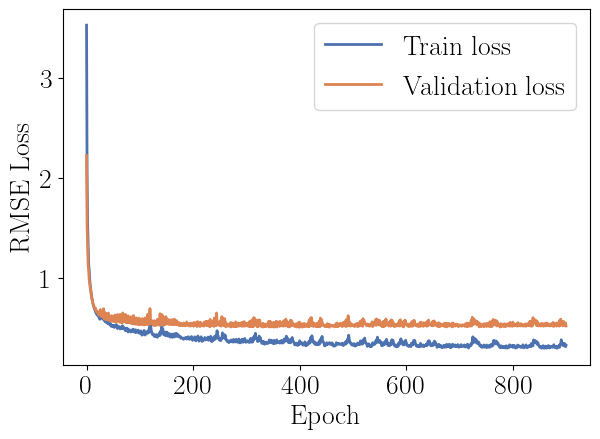

In [3]:
trainer.train()
trainer.plot_loss()

### Plotting predictions and comparing with baseline models.

Train Loss: 0.3174, R2: 0.9385
Validation Loss: 0.5056, R2: 0.8340
Test Loss: 0.5063, R2: 0.8492


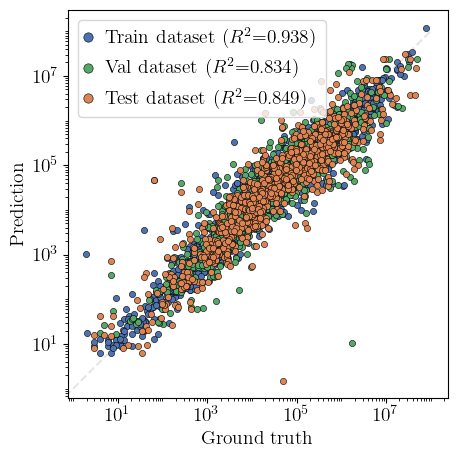

In [4]:
trainer.plot_truth_pred()

Train Loss: 0.2422, R2: 0.9642
Train Loss: 0.5148, R2: 0.8279
Test Loss: 0.4900, R2: 0.8587


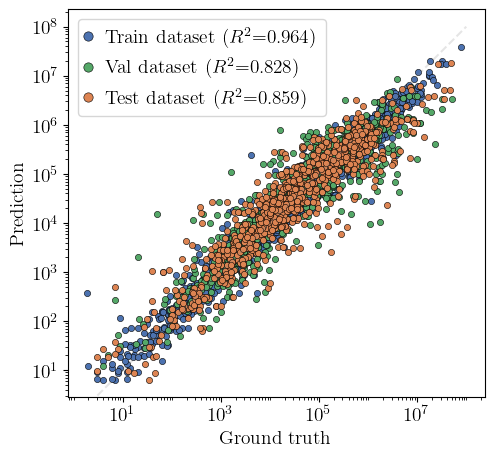

In [5]:
trainer.plot_truth_pred_sklearn(model_name='rf')

/home/xlluo/hdd/ML-fracture/venv/lib/python3.6/site-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.17797 | val_0_rmse: 29.91265|  0:00:00s
epoch 100| loss: 0.65397 | val_0_rmse: 0.89886 |  0:00:05s
epoch 200| loss: 0.59936 | val_0_rmse: 0.70361 |  0:00:11s
epoch 300| loss: 0.55181 | val_0_rmse: 0.57952 |  0:00:16s
epoch 400| loss: 0.53695 | val_0_rmse: 0.55836 |  0:00:21s
epoch 500| loss: 0.49426 | val_0_rmse: 0.56522 |  0:00:26s
epoch 600| loss: 0.47275 | val_0_rmse: 0.54277 |  0:00:32s
epoch 700| loss: 0.46646 | val_0_rmse: 0.5352  |  0:00:37s
epoch 800| loss: 0.44551 | val_0_rmse: 0.51482 |  0:00:42s
epoch 900| loss: 0.4294  | val_0_rmse: 0.52362 |  0:00:46s
epoch 1000| loss: 0.4334  | val_0_rmse: 0.52707 |  0:00:51s
epoch 1100| loss: 0.42234 | val_0_rmse: 0.51984 |  0:00:57s
epoch 1200| loss: 0.41627 | val_0_rmse: 0.51362 |  0:01:02s
epoch 1300| loss: 0.42213 | val_0_rmse: 0.50858 |  0:01:07s
epoch 1400| loss: 0.41014 | val_0_rmse: 0.50487 |  0:01:12s
epoch 1500| loss: 0.4197  | val_0_rmse: 0.50429 |  0:01:16s
epoch 1600| loss: 0.43789 | val_0_rmse: 0.52205 | 

/home/xlluo/hdd/ML-fracture/venv/lib/python3.6/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


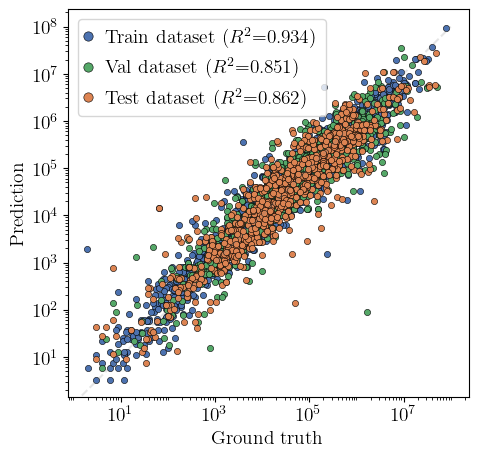

In [12]:
trainer.plot_truth_pred_sklearn(model_name='tabnet')

### Permutation feature importance

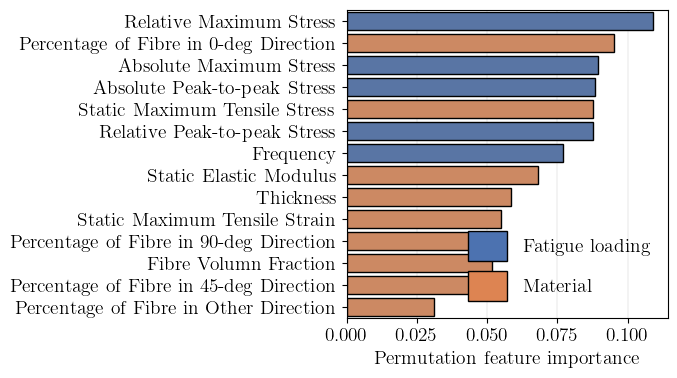

In [6]:
trainer.plot_feature_importance()

### Partial dependence

Calculate PDP:  Percentage of Fibre in 0-deg Direction
Calculate PDP:  Percentage of Fibre in 45-deg Direction
Calculate PDP:  Percentage of Fibre in 90-deg Direction
Calculate PDP:  Percentage of Fibre in Other Direction
Calculate PDP:  Absolute Maximum Stress
Calculate PDP:  Absolute Peak-to-peak Stress
Calculate PDP:  Frequency
Calculate PDP:  Fibre Volumn Fraction
Calculate PDP:  Relative Maximum Stress
Calculate PDP:  Relative Peak-to-peak Stress
Calculate PDP:  Thickness
Calculate PDP:  Static Maximum Tensile Stress
Calculate PDP:  Static Maximum Tensile Strain
Calculate PDP:  Static Elastic Modulus


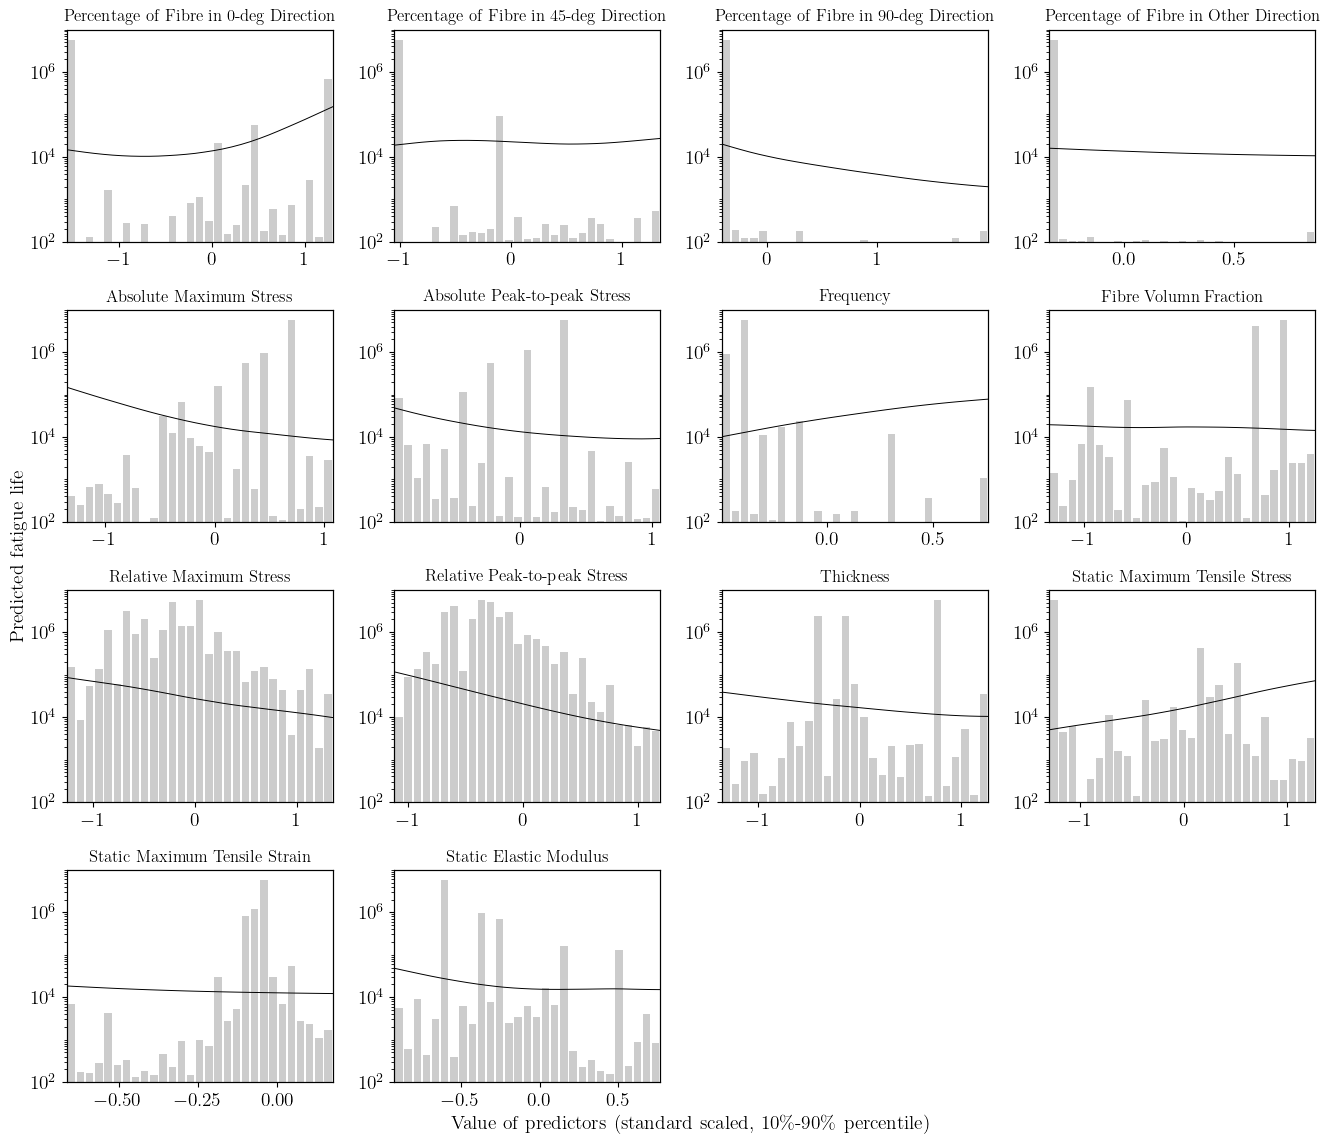

In [7]:
trainer.plot_partial_dependence()

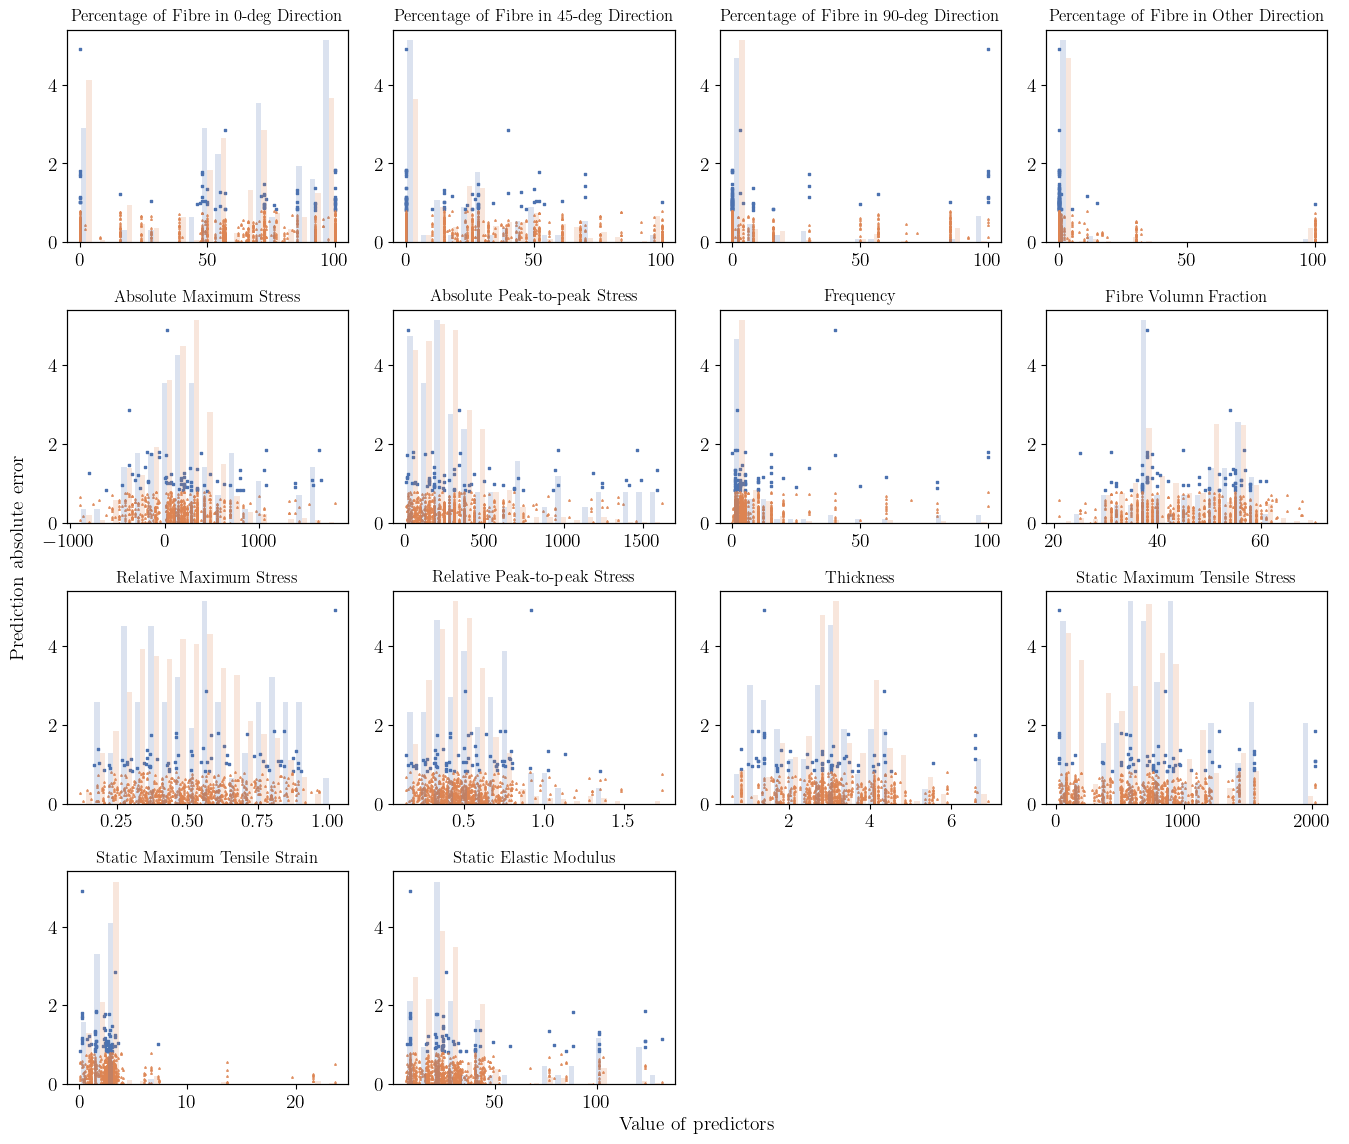

In [8]:
trainer.plot_partial_err()